In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Summary dataset
df_summary = pd.read_csv('3-month-V2X/jan-22/summary_jan-22.csv')

#Host dataset
df_host = pd.read_csv('3-month-V2X/jan-22/host_jan-22.csv')

In [3]:
print(df_summary.shape)
print(df_host.shape)

(5710, 43)
(13627175, 44)


In [4]:
df_summary.head()

uuid                         segmentid partitionDate  \
0  1640997773108110038  611a0e1208875eb72086a75d8ca78de2    2022-01-01   
1  1641003656021110429  119f15cecf793f3c7ae87edf4c2782bf    2022-01-01   
2  1641004870993110020  1d44a0ac41f3029d2e5d720a969d33f5    2022-01-01   
3  1641005617238110032  8e4d37d0d317eee9a83d3ee7d57603cb    2022-01-01   
4  1641006036089110009  ce80a5f34c3393b581a330d931b3c600    2022-01-01   

   device      timestamp  filedate  filetimeutc      updateTimeMs  sequenceNo  \
0   10038  1640997773108  20220101         4253  1668774694763851           1   
1   10429  1641003656021  20220101        22056  1668774718762895           1   
2   10020  1641004870993  20220101        24111  1668774686353782           1   
3   10032  1641005617238  20220101        25337  1668774863683486           1   
4   10009  1641006036089  20220101        30036  1668774835449449           1   

                                vin              tripId        utctime  \
0  0f6b1f657ac30ab76519ed4c677e9909   10038202201014253  1640997773108   
1  82077c274c8b1917a195adc43f641529  104292022010122056  1641003656021   
2  c1722a7941d61aad6e651a35b65a9c3e  100202022010124111  1641004870993   
3  c63a5650dcd0bf04b35bd712466010bc  100322022010125337  1641005617238   
4  483d8df877b31405c1e8fe4247f02d86  100092022010130036  1641006036089   

   startlocaltime  endlocaltime  swversionmaj  swversionmin  startlatitude  \
0         2573108       3873488           NaN           NaN            NaN   
1         8456021       9412107           NaN           NaN            NaN   
2         9670993      11945088           NaN           NaN            NaN   
3        10417238      10949738           NaN           NaN      27.814499   
4        10836089      10971353           NaN           NaN            NaN   

   startlongitude  endlatitude  endlongitude  startodometer  numBSMTx  \
0             NaN    27.800831    -82.307824            NaN     12266   
1             NaN    27.904013    -82.358562            NaN      9053   
2             NaN    27.785137    -82.312088            NaN     22570   
3      -82.312781    27.822904    -82.335471            0.0      5238   
4             NaN    27.712051    -82.334613            NaN      1221   

   numGNSSOutages  numCANOutages firmwareVersionString configsVersionString  \
0               1              1     HONDA-THEA-C-V1.5  HONDA-THEA-C-V1.5.2   
1               0              0    TOYOTA-THEA-C-V1.5                   00   
2               0              0     HONDA-THEA-C-V1.5  HONDA-THEA-C-V1.5.1   
3               0              0     HONDA-THEA-C-V1.5  HONDA-THEA-C-V1.5.2   
4               0              0     HONDA-THEA-C-V1.5  HONDA-THEA-C-V1.5.2   

  fullMediaVersionString deltaMediaVersionString pluginsVersionString  \
0      HONDA-THEA-C-V1.5                      00                   00   
1     TOYOTA-THEA-C-V1.5                      00                   00   
2      HONDA-THEA-C-V1.5                      00                   00   
3      HONDA-THEA-C-V1.5                      00                   00   
4      HONDA-THEA-C-V1.5                      00                   00   

   totalStorageOnDevice  storageUsed  configVersion  endodometer  \
0                 12385           51              0          0.0   
1                 12385           36              0          0.0   
2                 12385           51              0          0.0   
3                 12385           50              0          0.0   
4                 12385           50              0          0.0   

   numNormalBSMRx  numShadowBSMRx  numSPATRx  numWarnings  numInforms  \
0               0               0          0            0           0   
1             192               0          0            0           0   
2               0               0        166            0           0   
3               0               0          0            0           0   
4               0               0          0 

In [5]:
df_summary['vin'].nunique()

129

In [6]:
df_host.head()

uuid                         segmentid partitionDate  \
0  1640995200040181110014  6f813aebcbec975f467a1097ea94b802    2022-01-01   
1  1640995200055378610071  8ee8b375371d2fd0a4605848e4636989    2022-01-01   
2  1640995200540181210014  6f813aebcbec975f467a1097ea94b802    2022-01-01   
3  1640995200555378710071  8ee8b375371d2fd0a4605848e4636989    2022-01-01   
4  1640995201040181310014  6f813aebcbec975f467a1097ea94b802    2022-01-01   

   device      timestamp  filedate  filetimeutc   updateTimeMs  sequenceNo  \
0   10014  1640995200040  20220101       234454  1678858665000        1811   
1   10071  1640995200055  20220101       232855  1678858665000        3786   
2   10014  1640995200540  20220101       234454  1678858665000        1812   
3   10071  1640995200555  20220101       232855  1678858665000        3787   
4   10014  1640995201040  20220101       234454  1678858665000        1813   

                                vin               tripId  localTimeMs  \
0  7b9d31aa17b849b238ab79cef0733041  1001420220101234454     86400040   
1  4910fcdaedc2be5c5f05533b7a9cb8c2  1007120220101232855     86400055   
2  7b9d31aa17b849b238ab79cef0733041  1001420220101234454     86400540   
3  4910fcdaedc2be5c5f05533b7a9cb8c2  1007120220101232855     86400555   
4  7b9d31aa17b849b238ab79cef0733041  1001420220101234454     86401040   

    latitude  longitude  elevation    heading  gpsspeed  fixtypehvgps  \
0  27.975867 -82.277571  -6.099000  270.24347     0.726           2.0   
1  27.917010 -82.285677 -14.942000  359.93253    18.858           2.0   
2  27.975867 -82.277575  -6.135000  270.24347     1.042           2.0   
3  27.917095 -82.285677 -14.835999  359.83844    18.845           2.0   
4  27.975865 -82.277582  -6.194000  262.26047     1.869           2.0   

   gpssemimajaxis  gpssemiminaxis  gpsorientsemimaj   speed    yawrate  \
0            0.91            0.47             152.0   0.726  -0.000018   
1            0.57            0.48               4.3  18.858   0.241233   
2            0.90            0.47             151.0   1.042  -0.000003   
3            0.57            0.48               4.5  18.845   0.021451   
4            0.89            0.47             151.0   1.869 -10.275696   

   longaccel  transstate  gpsUncertaintyArea   speedMph  gpsspeedMph  \
0   0.419822         2.0            1.343659   1.624016     1.624016   
1  -0.073326         2.0            0.859540  42.184145    42.184145   
2   0.515054         2.0            1.328894   2.330888     2.330888   
3  -0.058381         2.0            0.859540  42.155064    42.155064   
4   1.414231         2.0            1.314128   4.180834     4.180834   

   elevationFt  gpssemimajaxisFt  gpssemiminaxisFt  brakestatus  \
0   -20.009843          2.985564          1.541995          0.0   
1   -49.022310          1.870079          1.574803          0.0   
2   -20.127952          2.952756          1.541995          0.0   
3   -48.674539          1.870079          1.574803          0.0   
4   -20.321522          2.919948          1.541995          0.0   

   throttlepospct  steerangle  turnsignal  headlamp  wiper  \
0             0.0         0.0         0.0       0.0    0.0   
1             0.0         0.0         0.0       0.0    0.0   
2             0.0         0.0         0.0       0.0    0.0   
3             0.0         0.0         0.0       0.0    0.0   
4             0.0         0.0         0.0       0.0    0.0   

   stabilitycontrolstatus  absstatus  traccontrolstatus  closestintersectid  \
0                     0.0        0.0                  0                   0   
1                     0.0        0.0                  0                   0   
2                     0.0        0.0                  0                   0   
3                     0.0        0.0                  0                   0   
4                     0.0        0.0                  0                   0   

   gpsUncertainFlag             timestamp_hr          updateTimeMs_hr  
0         

In [7]:
df_host.head()

uuid                         segmentid partitionDate  \
0  1640995200040181110014  6f813aebcbec975f467a1097ea94b802    2022-01-01   
1  1640995200055378610071  8ee8b375371d2fd0a4605848e4636989    2022-01-01   
2  1640995200540181210014  6f813aebcbec975f467a1097ea94b802    2022-01-01   
3  1640995200555378710071  8ee8b375371d2fd0a4605848e4636989    2022-01-01   
4  1640995201040181310014  6f813aebcbec975f467a1097ea94b802    2022-01-01   

   device      timestamp  filedate  filetimeutc   updateTimeMs  sequenceNo  \
0   10014  1640995200040  20220101       234454  1678858665000        1811   
1   10071  1640995200055  20220101       232855  1678858665000        3786   
2   10014  1640995200540  20220101       234454  1678858665000        1812   
3   10071  1640995200555  20220101       232855  1678858665000        3787   
4   10014  1640995201040  20220101       234454  1678858665000        1813   

                                vin               tripId  localTimeMs  \
0  7b9d31aa17b849b238ab79cef0733041  1001420220101234454     86400040   
1  4910fcdaedc2be5c5f05533b7a9cb8c2  1007120220101232855     86400055   
2  7b9d31aa17b849b238ab79cef0733041  1001420220101234454     86400540   
3  4910fcdaedc2be5c5f05533b7a9cb8c2  1007120220101232855     86400555   
4  7b9d31aa17b849b238ab79cef0733041  1001420220101234454     86401040   

    latitude  longitude  elevation    heading  gpsspeed  fixtypehvgps  \
0  27.975867 -82.277571  -6.099000  270.24347     0.726           2.0   
1  27.917010 -82.285677 -14.942000  359.93253    18.858           2.0   
2  27.975867 -82.277575  -6.135000  270.24347     1.042           2.0   
3  27.917095 -82.285677 -14.835999  359.83844    18.845           2.0   
4  27.975865 -82.277582  -6.194000  262.26047     1.869           2.0   

   gpssemimajaxis  gpssemiminaxis  gpsorientsemimaj   speed    yawrate  \
0            0.91            0.47             152.0   0.726  -0.000018   
1            0.57            0.48               4.3  18.858   0.241233   
2            0.90            0.47             151.0   1.042  -0.000003   
3            0.57            0.48               4.5  18.845   0.021451   
4            0.89            0.47             151.0   1.869 -10.275696   

   longaccel  transstate  gpsUncertaintyArea   speedMph  gpsspeedMph  \
0   0.419822         2.0            1.343659   1.624016     1.624016   
1  -0.073326         2.0            0.859540  42.184145    42.184145   
2   0.515054         2.0            1.328894   2.330888     2.330888   
3  -0.058381         2.0            0.859540  42.155064    42.155064   
4   1.414231         2.0            1.314128   4.180834     4.180834   

   elevationFt  gpssemimajaxisFt  gpssemiminaxisFt  brakestatus  \
0   -20.009843          2.985564          1.541995          0.0   
1   -49.022310          1.870079          1.574803          0.0   
2   -20.127952          2.952756          1.541995          0.0   
3   -48.674539          1.870079          1.574803          0.0   
4   -20.321522          2.919948          1.541995          0.0   

   throttlepospct  steerangle  turnsignal  headlamp  wiper  \
0             0.0         0.0         0.0       0.0    0.0   
1             0.0         0.0         0.0       0.0    0.0   
2             0.0         0.0         0.0       0.0    0.0   
3             0.0         0.0         0.0       0.0    0.0   
4             0.0         0.0         0.0       0.0    0.0   

   stabilitycontrolstatus  absstatus  traccontrolstatus  closestintersectid  \
0                     0.0        0.0                  0                   0   
1                     0.0        0.0                  0                   0   
2                     0.0        0.0                  0                   0   
3                     0.0        0.0                  0                   0   
4                     0.0        0.0                  0                   0   

   gpsUncertainFlag             timestamp_hr          updateTimeMs_hr  
0         

In [8]:
df_summary.head()

uuid                         segmentid partitionDate  \
0  1640997773108110038  611a0e1208875eb72086a75d8ca78de2    2022-01-01   
1  1641003656021110429  119f15cecf793f3c7ae87edf4c2782bf    2022-01-01   
2  1641004870993110020  1d44a0ac41f3029d2e5d720a969d33f5    2022-01-01   
3  1641005617238110032  8e4d37d0d317eee9a83d3ee7d57603cb    2022-01-01   
4  1641006036089110009  ce80a5f34c3393b581a330d931b3c600    2022-01-01   

   device      timestamp  filedate  filetimeutc      updateTimeMs  sequenceNo  \
0   10038  1640997773108  20220101         4253  1668774694763851           1   
1   10429  1641003656021  20220101        22056  1668774718762895           1   
2   10020  1641004870993  20220101        24111  1668774686353782           1   
3   10032  1641005617238  20220101        25337  1668774863683486           1   
4   10009  1641006036089  20220101        30036  1668774835449449           1   

                                vin              tripId        utctime  \
0  0f6b1f657ac30ab76519ed4c677e9909   10038202201014253  1640997773108   
1  82077c274c8b1917a195adc43f641529  104292022010122056  1641003656021   
2  c1722a7941d61aad6e651a35b65a9c3e  100202022010124111  1641004870993   
3  c63a5650dcd0bf04b35bd712466010bc  100322022010125337  1641005617238   
4  483d8df877b31405c1e8fe4247f02d86  100092022010130036  1641006036089   

   startlocaltime  endlocaltime  swversionmaj  swversionmin  startlatitude  \
0         2573108       3873488           NaN           NaN            NaN   
1         8456021       9412107           NaN           NaN            NaN   
2         9670993      11945088           NaN           NaN            NaN   
3        10417238      10949738           NaN           NaN      27.814499   
4        10836089      10971353           NaN           NaN            NaN   

   startlongitude  endlatitude  endlongitude  startodometer  numBSMTx  \
0             NaN    27.800831    -82.307824            NaN     12266   
1             NaN    27.904013    -82.358562            NaN      9053   
2             NaN    27.785137    -82.312088            NaN     22570   
3      -82.312781    27.822904    -82.335471            0.0      5238   
4             NaN    27.712051    -82.334613            NaN      1221   

   numGNSSOutages  numCANOutages firmwareVersionString configsVersionString  \
0               1              1     HONDA-THEA-C-V1.5  HONDA-THEA-C-V1.5.2   
1               0              0    TOYOTA-THEA-C-V1.5                   00   
2               0              0     HONDA-THEA-C-V1.5  HONDA-THEA-C-V1.5.1   
3               0              0     HONDA-THEA-C-V1.5  HONDA-THEA-C-V1.5.2   
4               0              0     HONDA-THEA-C-V1.5  HONDA-THEA-C-V1.5.2   

  fullMediaVersionString deltaMediaVersionString pluginsVersionString  \
0      HONDA-THEA-C-V1.5                      00                   00   
1     TOYOTA-THEA-C-V1.5                      00                   00   
2      HONDA-THEA-C-V1.5                      00                   00   
3      HONDA-THEA-C-V1.5                      00                   00   
4      HONDA-THEA-C-V1.5                      00                   00   

   totalStorageOnDevice  storageUsed  configVersion  endodometer  \
0                 12385           51              0          0.0   
1                 12385           36              0          0.0   
2                 12385           51              0          0.0   
3                 12385           50              0          0.0   
4                 12385           50              0          0.0   

   numNormalBSMRx  numShadowBSMRx  numSPATRx  numWarnings  numInforms  \
0               0               0          0            0           0   
1             192               0          0            0           0   
2               0               0        166            0           0   
3               0               0          0            0           0   
4               0               0          0 

In [9]:
df_summary.columns

Index(['uuid', 'segmentid', 'partitionDate', 'device', 'timestamp', 'filedate',
       'filetimeutc', 'updateTimeMs', 'sequenceNo', 'vin', 'tripId', 'utctime',
       'startlocaltime', 'endlocaltime', 'swversionmaj', 'swversionmin',
       'startlatitude', 'startlongitude', 'endlatitude', 'endlongitude',
       'startodometer', 'numBSMTx', 'numGNSSOutages', 'numCANOutages',
       'firmwareVersionString', 'configsVersionString',
       'fullMediaVersionString', 'deltaMediaVersionString',
       'pluginsVersionString', 'totalStorageOnDevice', 'storageUsed',
       'configVersion', 'endodometer', 'numNormalBSMRx', 'numShadowBSMRx',
       'numSPATRx', 'numWarnings', 'numInforms', 'numIntersectionEncounters',
       'timestamp_hr', 'updateTimeMs_hr', 'startlocaltime_hr',
       'endlocaltime_hr'],
      dtype='object')

In [10]:
df_host.columns

Index(['uuid', 'segmentid', 'partitionDate', 'device', 'timestamp', 'filedate',
       'filetimeutc', 'updateTimeMs', 'sequenceNo', 'vin', 'tripId',
       'localTimeMs', 'latitude', 'longitude', 'elevation', 'heading',
       'gpsspeed', 'fixtypehvgps', 'gpssemimajaxis', 'gpssemiminaxis',
       'gpsorientsemimaj', 'speed', 'yawrate', 'longaccel', 'transstate',
       'gpsUncertaintyArea', 'speedMph', 'gpsspeedMph', 'elevationFt',
       'gpssemimajaxisFt', 'gpssemiminaxisFt', 'brakestatus', 'throttlepospct',
       'steerangle', 'turnsignal', 'headlamp', 'wiper',
       'stabilitycontrolstatus', 'absstatus', 'traccontrolstatus',
       'closestintersectid', 'gpsUncertainFlag', 'timestamp_hr',
       'updateTimeMs_hr'],
      dtype='object')

In [11]:
df = pd.merge(df_summary[['tripId','device','startlocaltime',
                         'endlocaltime','startlatitude','startlongitude',
                         'endlatitude','endlongitude']], 
              df_host[['tripId','speed','speedMph','filedate','filetimeutc',
                      'localTimeMs','latitude','longitude','gpsspeed']], on = 'tripId')

In [12]:
df.shape

(12698766, 16)

In [13]:
df.head()

tripId  device  startlocaltime  endlocaltime  startlatitude  \
0  10038202201014253   10038         2573108       3873488            NaN   
1  10038202201014253   10038         2573108       3873488            NaN   
2  10038202201014253   10038         2573108       3873488            NaN   
3  10038202201014253   10038         2573108       3873488            NaN   
4  10038202201014253   10038         2573108       3873488            NaN   

   startlongitude  endlatitude  endlongitude  speed    speedMph  filedate  \
0             NaN    27.800831    -82.307824    NaN  2236.93629  20220101   
1             NaN    27.800831    -82.307824    NaN  2236.93629  20220101   
2             NaN    27.800831    -82.307824    NaN  2236.93629  20220101   
3             NaN    27.800831    -82.307824    NaN  2236.93629  20220101   
4             NaN    27.800831    -82.307824    NaN  2236.93629  20220101   

   filetimeutc  localTimeMs  latitude  longitude  gpsspeed  
0         4253      2573608       NaN        NaN       NaN  
1         4253      2574108       NaN        NaN       NaN  
2         4253      2574608       NaN        NaN       NaN  
3         4253      2575108       NaN        NaN       NaN  
4         4253      2575608       NaN        NaN       NaN

In [14]:
df = df.sort_values(by = ['tripId','filedate','localTimeMs'])
df.head()

tripId  device  startlocaltime  endlocaltime  startlatitude  \
6990566  13520220120733     135          453422        512428      40.092302   
6990567  13520220120733     135          453422        512428      40.092302   
6990568  13520220120733     135          453422        512428      40.092302   
6990569  13520220120733     135          453422        512428      40.092302   
6990570  13520220120733     135          453422        512428      40.092302   

         startlongitude  endlatitude  endlongitude  speed    speedMph  \
6990566      -83.050165    40.092302    -83.050165    NaN  2236.93629   
6990567      -83.050165    40.092302    -83.050165    NaN  2236.93629   
6990568      -83.050165    40.092302    -83.050165    NaN  2236.93629   
6990569      -83.050165    40.092302    -83.050165    NaN  2236.93629   
6990570      -83.050165    40.092302    -83.050165    NaN  2236.93629   

         filedate  filetimeutc  localTimeMs   latitude  longitude  gpsspeed  
6990566  20220120          733       453922  40.092302 -83.050165  0.012333  
6990567  20220120          733       454422  40.092302 -83.050165  0.009764  
6990568  20220120          733       454930  40.092302 -83.050165  0.011306  
6990569  20220120          733       455536  40.092302 -83.050165  0.020042  
6990570  20220120          733       456122  40.092302 -83.050165  0.013361

In [15]:
from geopy.geocoders import Photon

geolocator = Photon(user_agent="measurements")
 

Latitude = "40.092302"
Longitude = "-83.050165"
 
location = geolocator.reverse(Latitude+","+Longitude)
 

In [16]:
location.raw['properties']['city']+", "+location.raw['properties']['state']

'Worthington, OH'

In [17]:
location.raw['properties']

{'osm_id': 560789639,
 'extent': [-83.0501404, 40.0922064, -83.0499611, 40.0921113],
 'country': 'United States',
 'city': 'Worthington',
 'countrycode': 'US',
 'postcode': '43085',
 'county': 'Franklin County',
 'type': 'house',
 'osm_type': 'W',
 'osm_key': 'building',
 'housenumber': '6233',
 'street': 'Linworth Road',
 'osm_value': 'yes',
 'state': 'OH'}

In [18]:
df['startlatitude'].describe()

count    5.026630e+06
mean     2.994208e+01
std      4.516010e+00
min      2.661718e+01
25%      2.787279e+01
50%      2.793580e+01
75%      2.801392e+01
max      4.048046e+01
Name: startlatitude, dtype: float64

In [19]:
df_latlon = df[['tripId','startlatitude','startlongitude','endlatitude','endlongitude']].drop_duplicates()

In [20]:
df_latlon.shape

(5441, 5)

In [21]:
df_latlon['startlatlon'] = df.apply(lambda x: str(x.startlatitude)+","+str(x.startlongitude),axis = 1)
df_latlon['endlatlon'] = df.apply(lambda x: str(x.endlatitude)+","+str(x.endlongitude),axis = 1)

In [22]:
def get_location(x):
    try:
        location = geolocator.reverse(x)
        return location.raw['properties']['city']+", "+location.raw['properties']['state']
    except:
        return "None"

In [23]:
df_latlon.head()

tripId  startlatitude  startlongitude  endlatitude  \
6990566  13520220120733      40.092302      -83.050165    40.092302   
6990682  13520220120908      40.092302      -83.050165    40.092302   
1021576  68202201051319      40.126656      -83.168114    40.088114   
6444125  68202201191544            NaN             NaN    40.116087   
1360199  75202201061413            NaN             NaN    40.304500   

         endlongitude                           startlatlon  \
6990566    -83.050165  40.09230185581797,-83.05016503754663   
6990682    -83.050165  40.09230185581797,-83.05016503754663   
1021576    -83.103126  40.12665626685504,-83.16811362128793   
6444125    -83.151320                               nan,nan   
1360199    -83.530180                               nan,nan   

                                     endlatlon  
6990566   40.09230185581797,-83.05016503754663  
6990682   40.09230185581797,-83.05016503754663  
1021576   40.08811358400198,-83.10312626969808  
6444125   40.11608731979336,-83.15131955919647  
1360199  40.304499897573784,-83.53018030151523

In [24]:
df_1 = df_latlon.head()

In [25]:
import time
start_time = time.time()
df_latlon['startaddress'] = df_latlon['startlatlon'].apply(get_location)
print("--- %s seconds ---" % (time.time() - start_time))


--- 3983.3166670799255 seconds ---


In [27]:
df_latlon['startaddress'].value_counts(normalize = True)

None                         0.589230
Tampa, Florida               0.061753
Brandon, FL                  0.044110
Riverview, FL                0.043191
Tampa, FL                    0.041169
Brandon, Florida             0.032163
Marysville, OH               0.014703
Dublin, Ohio                 0.011395
Marysville, Ohio             0.010292
Columbus, OH                 0.009741
Saint Petersburg, FL         0.009189
Valrico, FL                  0.009006
Columbus, Ohio               0.008638
Lithia, FL                   0.008087
Dublin, OH                   0.007352
Saint Petersburg, Florida    0.006249
Riverview, Florida           0.005330
Clearwater, FL               0.005146
Palm River-Clair Mel, FL     0.005146
Fish Hawk, FL                0.004595
Worthington, Ohio            0.003860
Raymond, OH                  0.003492
Hilliard, Ohio               0.003492
Allen Township, Ohio         0.003308
Delaware, Ohio               0.003308
Worthington, OH              0.003308
Washington T

In [28]:
import time
start_time = time.time()
df_latlon['endaddress'] = df_latlon['endlatlon'].apply(get_location)
print("--- %s seconds ---" % (time.time() - start_time))


--- 7947.962496042252 seconds ---


In [30]:
df_latlon['endaddress'].value_counts(normalize = True)

None                              0.180665
Tampa, Florida                    0.131410
Riverview, FL                     0.095571
Brandon, FL                       0.086014
Tampa, FL                         0.078294
Brandon, Florida                  0.056975
Valrico, FL                       0.024995
Dublin, Ohio                      0.022974
Marysville, Ohio                  0.021320
Raymond, OH                       0.018747
Marysville, OH                    0.018379
Saint Petersburg, FL              0.017276
Lithia, FL                        0.014887
Columbus, Ohio                    0.013417
Riverview, Florida                0.013233
Fish Hawk, FL                     0.011395
Saint Petersburg, Florida         0.010660
Columbus, OH                      0.010108
Worthington, Ohio                 0.009557
Palm River-Clair Mel, FL          0.009006
Washington Township, Ohio         0.008454
Hilliard, Ohio                    0.008087
Allen Township, Ohio              0.007719
Boyette, Fl

In [33]:
df_latlon['endstate'] = df_latlon['endaddress'].apply(lambda x: x.split(',')[1] if x != 'None' else 'None')

In [34]:
df_latlon['endstate'].value_counts(normalize = True)

 FL                0.380261
 Florida           0.258592
None               0.180665
 Ohio              0.110641
 OH                0.067635
 North Carolina    0.000735
 SC                0.000551
 VA                0.000551
 NC                0.000368
Name: endstate, dtype: float64

In [35]:
0.380261 + 0.258592

0.638853

In [37]:
df[~(df['latitude'].isna())].head(100)

tripId  device  startlocaltime  endlocaltime  startlatitude  \
6990566  13520220120733     135          453422        512428      40.092302   
6990567  13520220120733     135          453422        512428      40.092302   
6990568  13520220120733     135          453422        512428      40.092302   
6990569  13520220120733     135          453422        512428      40.092302   
6990570  13520220120733     135          453422        512428      40.092302   
6990571  13520220120733     135          453422        512428      40.092302   
6990572  13520220120733     135          453422        512428      40.092302   
6990573  13520220120733     135          453422        512428      40.092302   
6990574  13520220120733     135          453422        512428      40.092302   
6990575  13520220120733     135          453422        512428      40.092302   
6990576  13520220120733     135          453422        512428      40.092302   
6990577  13520220120733     135          453422        512428      40.092302   
6990578  13520220120733     135          453422        512428      40.092302   
6990579  13520220120733     135          453422        512428      40.092302   
6990580  13520220120733     135          453422        512428      40.092302   
6990581  13520220120733     135          453422        512428      40.092302   
6990582  13520220120733     135          453422        512428      40.092302   
6990583  13520220120733     135          453422        512428      40.092302   
6990584  13520220120733     135          453422        512428      40.092302   
6990585  13520220120733     135          453422        512428      40.092302   
6990586  13520220120733     135          453422        512428      40.092302   
6990587  13520220120733     135          453422        512428      40.092302   
6990588  13520220120733     135          453422        512428      40.092302   
6990589  13520220120733     135          453422        512428      40.092302   
6990590  13520220120733     135          453422        512428      40.092302   
6990591  13520220120733     135          453422        512428      40.092302   
6990592  13520220120733     135          453422        512428      40.092302   
6990593  13520220120733     135          453422        512428      40.092302   
6990594  13520220120733     135          453422        512428      40.092302   
6990595  13520220120733     135          453422        512428      40.092302   
6990596  13520220120733     135          453422        512428      40.092302   
6990597  13520220120733     135          453422        512428      40.092302   
6990598  13520220120733     135          453422        512428      40.092302   
6990599  13520220120733     135          453422        512428      40.092302   
6990600  13520220120733     135          453422        512428      40.092302   
6990601  13520220120733     135          453422        512428      40.092302   
6990602  13520220120733     135          453422        512428      40.092302   
6990603  13520220120733     135          453422        512428      40.092302   
6990604  13520220120733     135          453422        512428      40.092302   
6990605  13520220120733     135          453422        512428      40.092302   
6990606  13520220120733     135          453422        512428      40.092302   
6990607  13520220120733     135          453422        512428      40.092302   
6990608  13520220120733     135          453422        512428      40.092302   
6990609  13520220120733     135          453422        512428      40.092302   
6990610  13520220120733     135          453422        512428      40.092302   
6990611  13520220120733     135          453422        512428      40.092302   
6990612  13520220120733     135          453422        512428      40.092302   
6990613  13520220120733     135          453422        512428      40.092302   
6990614  13520220120733     135          453422        512428      40.092302   
6990615  13520220

In [39]:
df_host.head()

uuid                         segmentid partitionDate  \
0  1640995200040181110014  6f813aebcbec975f467a1097ea94b802    2022-01-01   
1  1640995200055378610071  8ee8b375371d2fd0a4605848e4636989    2022-01-01   
2  1640995200540181210014  6f813aebcbec975f467a1097ea94b802    2022-01-01   
3  1640995200555378710071  8ee8b375371d2fd0a4605848e4636989    2022-01-01   
4  1640995201040181310014  6f813aebcbec975f467a1097ea94b802    2022-01-01   

   device      timestamp  filedate  filetimeutc   updateTimeMs  sequenceNo  \
0   10014  1640995200040  20220101       234454  1678858665000        1811   
1   10071  1640995200055  20220101       232855  1678858665000        3786   
2   10014  1640995200540  20220101       234454  1678858665000        1812   
3   10071  1640995200555  20220101       232855  1678858665000        3787   
4   10014  1640995201040  20220101       234454  1678858665000        1813   

                                vin               tripId  localTimeMs  \
0  7b9d31aa17b849b238ab79cef0733041  1001420220101234454     86400040   
1  4910fcdaedc2be5c5f05533b7a9cb8c2  1007120220101232855     86400055   
2  7b9d31aa17b849b238ab79cef0733041  1001420220101234454     86400540   
3  4910fcdaedc2be5c5f05533b7a9cb8c2  1007120220101232855     86400555   
4  7b9d31aa17b849b238ab79cef0733041  1001420220101234454     86401040   

    latitude  longitude  elevation    heading  gpsspeed  fixtypehvgps  \
0  27.975867 -82.277571  -6.099000  270.24347     0.726           2.0   
1  27.917010 -82.285677 -14.942000  359.93253    18.858           2.0   
2  27.975867 -82.277575  -6.135000  270.24347     1.042           2.0   
3  27.917095 -82.285677 -14.835999  359.83844    18.845           2.0   
4  27.975865 -82.277582  -6.194000  262.26047     1.869           2.0   

   gpssemimajaxis  gpssemiminaxis  gpsorientsemimaj   speed    yawrate  \
0            0.91            0.47             152.0   0.726  -0.000018   
1            0.57            0.48               4.3  18.858   0.241233   
2            0.90            0.47             151.0   1.042  -0.000003   
3            0.57            0.48               4.5  18.845   0.021451   
4            0.89            0.47             151.0   1.869 -10.275696   

   longaccel  transstate  gpsUncertaintyArea   speedMph  gpsspeedMph  \
0   0.419822         2.0            1.343659   1.624016     1.624016   
1  -0.073326         2.0            0.859540  42.184145    42.184145   
2   0.515054         2.0            1.328894   2.330888     2.330888   
3  -0.058381         2.0            0.859540  42.155064    42.155064   
4   1.414231         2.0            1.314128   4.180834     4.180834   

   elevationFt  gpssemimajaxisFt  gpssemiminaxisFt  brakestatus  \
0   -20.009843          2.985564          1.541995          0.0   
1   -49.022310          1.870079          1.574803          0.0   
2   -20.127952          2.952756          1.541995          0.0   
3   -48.674539          1.870079          1.574803          0.0   
4   -20.321522          2.919948          1.541995          0.0   

   throttlepospct  steerangle  turnsignal  headlamp  wiper  \
0             0.0         0.0         0.0       0.0    0.0   
1             0.0         0.0         0.0       0.0    0.0   
2             0.0         0.0         0.0       0.0    0.0   
3             0.0         0.0         0.0       0.0    0.0   
4             0.0         0.0         0.0       0.0    0.0   

   stabilitycontrolstatus  absstatus  traccontrolstatus  closestintersectid  \
0                     0.0        0.0                  0                   0   
1                     0.0        0.0                  0                   0   
2                     0.0        0.0                  0                   0   
3                     0.0        0.0                  0                   0   
4                     0.0        0.0                  0                   0   

   gpsUncertainFlag             timestamp_hr          updateTimeMs_hr  
0         

In [40]:
df.head()

tripId  device  startlocaltime  endlocaltime  startlatitude  \
6990566  13520220120733     135          453422        512428      40.092302   
6990567  13520220120733     135          453422        512428      40.092302   
6990568  13520220120733     135          453422        512428      40.092302   
6990569  13520220120733     135          453422        512428      40.092302   
6990570  13520220120733     135          453422        512428      40.092302   

         startlongitude  endlatitude  endlongitude  speed    speedMph  \
6990566      -83.050165    40.092302    -83.050165    NaN  2236.93629   
6990567      -83.050165    40.092302    -83.050165    NaN  2236.93629   
6990568      -83.050165    40.092302    -83.050165    NaN  2236.93629   
6990569      -83.050165    40.092302    -83.050165    NaN  2236.93629   
6990570      -83.050165    40.092302    -83.050165    NaN  2236.93629   

         filedate  filetimeutc  localTimeMs   latitude  longitude  gpsspeed  
6990566  20220120          733       453922  40.092302 -83.050165  0.012333  
6990567  20220120          733       454422  40.092302 -83.050165  0.009764  
6990568  20220120          733       454930  40.092302 -83.050165  0.011306  
6990569  20220120          733       455536  40.092302 -83.050165  0.020042  
6990570  20220120          733       456122  40.092302 -83.050165  0.013361

In [41]:
df_latlon.to_csv('location_jan_22.csv',index = False)

In [42]:
df.head()

tripId  device  startlocaltime  endlocaltime  startlatitude  \
6990566  13520220120733     135          453422        512428      40.092302   
6990567  13520220120733     135          453422        512428      40.092302   
6990568  13520220120733     135          453422        512428      40.092302   
6990569  13520220120733     135          453422        512428      40.092302   
6990570  13520220120733     135          453422        512428      40.092302   

         startlongitude  endlatitude  endlongitude  speed    speedMph  \
6990566      -83.050165    40.092302    -83.050165    NaN  2236.93629   
6990567      -83.050165    40.092302    -83.050165    NaN  2236.93629   
6990568      -83.050165    40.092302    -83.050165    NaN  2236.93629   
6990569      -83.050165    40.092302    -83.050165    NaN  2236.93629   
6990570      -83.050165    40.092302    -83.050165    NaN  2236.93629   

         filedate  filetimeutc  localTimeMs   latitude  longitude  gpsspeed  
6990566  20220120          733       453922  40.092302 -83.050165  0.012333  
6990567  20220120          733       454422  40.092302 -83.050165  0.009764  
6990568  20220120          733       454930  40.092302 -83.050165  0.011306  
6990569  20220120          733       455536  40.092302 -83.050165  0.020042  
6990570  20220120          733       456122  40.092302 -83.050165  0.013361

In [66]:
df[['tripId']].drop_duplicates().head()

tripId
6990566  13520220120733
6990682  13520220120908
1021576  68202201051319
6444125  68202201191544
1360199  75202201061413

In [109]:
trip = df[df['tripId'] == 68202201051319]
trip.shape

(1523, 16)

In [110]:
trip

tripId  device  startlocaltime  endlocaltime  startlatitude  \
1021576  68202201051319      68          799315       1561361      40.126656   
1021577  68202201051319      68          799315       1561361      40.126656   
1021578  68202201051319      68          799315       1561361      40.126656   
1021579  68202201051319      68          799315       1561361      40.126656   
1021580  68202201051319      68          799315       1561361      40.126656   
1021581  68202201051319      68          799315       1561361      40.126656   
1021582  68202201051319      68          799315       1561361      40.126656   
1021583  68202201051319      68          799315       1561361      40.126656   
1021584  68202201051319      68          799315       1561361      40.126656   
1021585  68202201051319      68          799315       1561361      40.126656   
1021586  68202201051319      68          799315       1561361      40.126656   
1021587  68202201051319      68          799315       1561361      40.126656   
1021588  68202201051319      68          799315       1561361      40.126656   
1021589  68202201051319      68          799315       1561361      40.126656   
1021590  68202201051319      68          799315       1561361      40.126656   
1021591  68202201051319      68          799315       1561361      40.126656   
1021592  68202201051319      68          799315       1561361      40.126656   
1021593  68202201051319      68          799315       1561361      40.126656   
1021594  68202201051319      68          799315       1561361      40.126656   
1021595  68202201051319      68          799315       1561361      40.126656   
1021596  68202201051319      68          799315       1561361      40.126656   
1021597  68202201051319      68          799315       1561361      40.126656   
1021598  68202201051319      68          799315       1561361      40.126656   
1021599  68202201051319      68          799315       1561361      40.126656   
1021600  68202201051319      68          799315       1561361      40.126656   
1021601  68202201051319      68          799315       1561361      40.126656   
1021602  68202201051319      68          799315       1561361      40.126656   
1021603  68202201051319      68          799315       1561361      40.126656   
1021604  68202201051319      68          799315       1561361      40.126656   
1021605  68202201051319      68          799315       1561361      40.126656   
1021606  68202201051319      68          799315       1561361      40.126656   
1021607  68202201051319      68          799315       1561361      40.126656   
1021608  68202201051319      68          799315       1561361      40.126656   
1021609  68202201051319      68          799315       1561361      40.126656   
1021610  68202201051319      68          799315       1561361      40.126656   
1021611  68202201051319      68          799315       1561361      40.126656   
1021612  68202201051319      68          799315       1561361      40.126656   
1021613  68202201051319      68          799315       1561361      40.126656   
1021614  68202201051319      68          799315       1561361      40.126656   
1021615  68202201051319      68          799315       1561361      40.126656   
1021616  68202201051319      68          799315       1561361      40.126656   
1021617  68202201051319      68          799315       1561361      40.126656   
1021618  68202201051319      68          799315       1561361      40.126656   
1021619  68202201051319      68          799315       1561361      40.126656   
1021620  68202201051319      68          799315       1561361      40.126656   
1021621  68202201051319      68          799315       1561361      40.126656   
1021622  68202201051319      68          799315       1561361      40.126656   
1021623  68202201051319      68          799315       1561361      40.126656   
1021624  68202201051319      68          799315       1561361      40.126656   
1021625  68202201

In [111]:
import folium
map = folium.Map(location=[40.092302,-83.050165], zoom_start=13)

In [112]:
map

In [113]:
points = [[trip[['latitude','longitude']].iloc[i,0], trip[['latitude','longitude']].iloc[i,1]] for i in range(0,len(trip))]

In [114]:
for point in points:
    folium.CircleMarker(point,radius = 1,color = 'red',fill = True).add_to(map)

In [115]:
map

<Axes: xlabel='latitude', ylabel='longitude'>

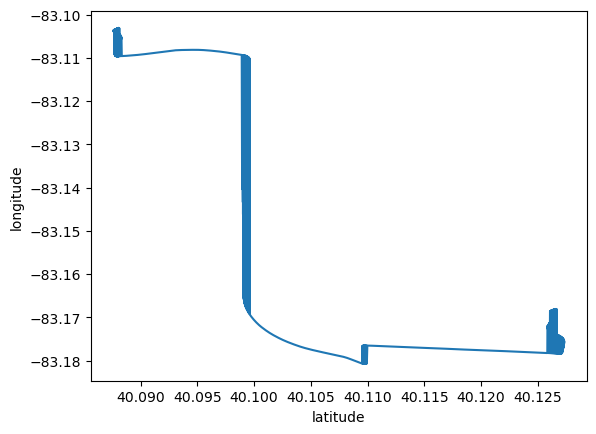

In [116]:
import seaborn as sns
sns.lineplot(x = 'latitude', y = 'longitude', data = trip)

In [117]:
path_df = df.groupby('tripId')[['latitude','longitude']].nunique().reset_index()

In [118]:
path_df.shape

(5441, 3)

In [119]:
path_df[path_df['latitude'] > 1].head()

tripId  latitude  longitude
2  68202201051319      1449       1451
3  68202201191544       630        630
5  84202201154916      2565       2591
6  84202201223251      1281       1294
7  84202201233450       630        634

In [120]:
trip = df[df['tripId'] == 68202201191544]
trip.shape

(727, 16)

In [121]:
trip

tripId  device  startlocaltime  endlocaltime  startlatitude  \
6444125  68202201191544      68          944584       1311407            NaN   
6444126  68202201191544      68          944584       1311407            NaN   
6444127  68202201191544      68          944584       1311407            NaN   
6444128  68202201191544      68          944584       1311407            NaN   
6444129  68202201191544      68          944584       1311407            NaN   
6444130  68202201191544      68          944584       1311407            NaN   
6444131  68202201191544      68          944584       1311407            NaN   
6444132  68202201191544      68          944584       1311407            NaN   
6444133  68202201191544      68          944584       1311407            NaN   
6444134  68202201191544      68          944584       1311407            NaN   
6444135  68202201191544      68          944584       1311407            NaN   
6444136  68202201191544      68          944584       1311407            NaN   
6444137  68202201191544      68          944584       1311407            NaN   
6444138  68202201191544      68          944584       1311407            NaN   
6444139  68202201191544      68          944584       1311407            NaN   
6444140  68202201191544      68          944584       1311407            NaN   
6444141  68202201191544      68          944584       1311407            NaN   
6444142  68202201191544      68          944584       1311407            NaN   
6444143  68202201191544      68          944584       1311407            NaN   
6444144  68202201191544      68          944584       1311407            NaN   
6444145  68202201191544      68          944584       1311407            NaN   
6444146  68202201191544      68          944584       1311407            NaN   
6444147  68202201191544      68          944584       1311407            NaN   
6444148  68202201191544      68          944584       1311407            NaN   
6444149  68202201191544      68          944584       1311407            NaN   
6444150  68202201191544      68          944584       1311407            NaN   
6444151  68202201191544      68          944584       1311407            NaN   
6444152  68202201191544      68          944584       1311407            NaN   
6444153  68202201191544      68          944584       1311407            NaN   
6444154  68202201191544      68          944584       1311407            NaN   
6444155  68202201191544      68          944584       1311407            NaN   
6444156  68202201191544      68          944584       1311407            NaN   
6444157  68202201191544      68          944584       1311407            NaN   
6444158  68202201191544      68          944584       1311407            NaN   
6444159  68202201191544      68          944584       1311407            NaN   
6444160  68202201191544      68          944584       1311407            NaN   
6444161  68202201191544      68          944584       1311407            NaN   
6444162  68202201191544      68          944584       1311407            NaN   
6444163  68202201191544      68          944584       1311407            NaN   
6444164  68202201191544      68          944584       1311407            NaN   
6444165  68202201191544      68          944584       1311407            NaN   
6444166  68202201191544      68          944584       1311407            NaN   
6444167  68202201191544      68          944584       1311407            NaN   
6444168  68202201191544      68          944584       1311407            NaN   
6444169  68202201191544      68          944584       1311407            NaN   
6444170  68202201191544      68          944584       1311407            NaN   
6444171  68202201191544      68          944584       1311407            NaN   
6444172  68202201191544      68          944584       1311407            NaN   
6444173  68202201191544      68          944584       1311407            NaN   
6444174  68202201

In [122]:
trip['latlon'] = trip.apply(lambda x: str(x.latitude)+","+str(x.longitude),axis = 1)

/var/folders/_2/d61kw_gs56z84_px9_4y5sk00000gp/T/ipykernel_10828/3312484292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip['latlon'] = trip.apply(lambda x: str(x.latitude)+","+str(x.longitude),axis = 1)


In [133]:
trip.head(100)

tripId  device  startlocaltime  endlocaltime  startlatitude  \
6444160  68202201191544      68          944584       1311407            NaN   
6444161  68202201191544      68          944584       1311407            NaN   
6444162  68202201191544      68          944584       1311407            NaN   
6444163  68202201191544      68          944584       1311407            NaN   
6444164  68202201191544      68          944584       1311407            NaN   
6444165  68202201191544      68          944584       1311407            NaN   
6444166  68202201191544      68          944584       1311407            NaN   
6444167  68202201191544      68          944584       1311407            NaN   
6444168  68202201191544      68          944584       1311407            NaN   
6444169  68202201191544      68          944584       1311407            NaN   
6444170  68202201191544      68          944584       1311407            NaN   
6444171  68202201191544      68          944584       1311407            NaN   
6444172  68202201191544      68          944584       1311407            NaN   
6444173  68202201191544      68          944584       1311407            NaN   
6444174  68202201191544      68          944584       1311407            NaN   
6444175  68202201191544      68          944584       1311407            NaN   
6444176  68202201191544      68          944584       1311407            NaN   
6444177  68202201191544      68          944584       1311407            NaN   
6444178  68202201191544      68          944584       1311407            NaN   
6444179  68202201191544      68          944584       1311407            NaN   
6444180  68202201191544      68          944584       1311407            NaN   
6444181  68202201191544      68          944584       1311407            NaN   
6444182  68202201191544      68          944584       1311407            NaN   
6444183  68202201191544      68          944584       1311407            NaN   
6444184  68202201191544      68          944584       1311407            NaN   
6444185  68202201191544      68          944584       1311407            NaN   
6444186  68202201191544      68          944584       1311407            NaN   
6444187  68202201191544      68          944584       1311407            NaN   
6444188  68202201191544      68          944584       1311407            NaN   
6444189  68202201191544      68          944584       1311407            NaN   
6444190  68202201191544      68          944584       1311407            NaN   
6444191  68202201191544      68          944584       1311407            NaN   
6444192  68202201191544      68          944584       1311407            NaN   
6444193  68202201191544      68          944584       1311407            NaN   
6444194  68202201191544      68          944584       1311407            NaN   
6444195  68202201191544      68          944584       1311407            NaN   
6444196  68202201191544      68          944584       1311407            NaN   
6444197  68202201191544      68          944584       1311407            NaN   
6444198  68202201191544      68          944584       1311407            NaN   
6444199  68202201191544      68          944584       1311407            NaN   
6444200  68202201191544      68          944584       1311407            NaN   
6444201  68202201191544      68          944584       1311407            NaN   
6444202  68202201191544      68          944584       1311407            NaN   
6444203  68202201191544      68          944584       1311407            NaN   
6444204  68202201191544      68          944584       1311407            NaN   
6444205  68202201191544      68          944584       1311407            NaN   
6444206  68202201191544      68          944584       1311407            NaN   
6444207  68202201191544      68          944584       1311407            NaN   
6444208  68202201191544      68          944584       1311407            NaN   
6444209  68202201

In [205]:
location = geolocator.reverse('40.12492104723782,-83.16465705741612')

In [207]:
location.raw

{'geometry': {'coordinates': [-83.16557, 40.12514], 'type': 'Point'},
 'type': 'Feature',
 'properties': {'osm_id': 21366656,
  'extent': [-83.165826, 40.12514, -83.16557, 40.124284],
  'country': 'United States',
  'city': 'Dublin',
  'countrycode': 'US',
  'postcode': '43016',
  'county': 'Franklin County',
  'type': 'street',
  'osm_type': 'W',
  'osm_key': 'highway',
  'osm_value': 'residential',
  'name': 'Walton Drive',
  'state': 'Ohio'}}

In [201]:
location.raw['properties']

{'osm_id': 21384616,
 'extent': [-83.1523071, 40.1157596, -83.1521462, 40.115717],
 'country': 'United States',
 'city': 'Dublin',
 'countrycode': 'US',
 'postcode': '43017',
 'county': 'Franklin County',
 'type': 'street',
 'osm_type': 'W',
 'osm_key': 'highway',
 'osm_value': 'tertiary',
 'name': 'Mojave Street',
 'state': 'Ohio'}

In [186]:
def get_location(x):
    try:
        location = geolocator.reverse(x)
        return location.raw['properties']['name']+", "+location.raw['properties']['county']
    except:
        return "None"

In [187]:
trip['location'] = trip['latlon'].apply(get_location)

In [190]:
trip['location']

6444160            Tully Court, Franklin County
6444161            Tully Court, Franklin County
6444162            Tully Court, Franklin County
6444163            Tully Court, Franklin County
6444164            Tully Court, Franklin County
6444165            Tully Court, Franklin County
6444166            Tully Court, Franklin County
6444167            Tully Court, Franklin County
6444168            Tully Court, Franklin County
6444169            Tully Court, Franklin County
6444170            Tully Court, Franklin County
6444171            Tully Court, Franklin County
6444172            Tully Court, Franklin County
6444173            Tully Court, Franklin County
6444174            Tully Court, Franklin County
6444175            Tully Court, Franklin County
6444176            Tully Court, Franklin County
6444177            Tully Court, Franklin County
6444178            Tully Court, Franklin County
6444179            Tully Court, Franklin County
6444180            Tully Court, Franklin

In [189]:
map

In [184]:
point = [40.116087,-83.15132]
folium.CircleMarker(point,radius = 5,color = 'blue',fill = True).add_to(map)

In [185]:
map

In [171]:
import folium
map = folium.Map(location=[40.116087, -83.15132], zoom_start=13)

In [172]:
map

In [173]:
trip = trip[trip['latitude'].isna() == False]

In [174]:
points = [[trip[['latitude','longitude']].iloc[i,0], trip[['latitude','longitude']].iloc[i,1]] for i in range(0,len(trip))]

In [175]:
for point in points:
    folium.CircleMarker(point,radius = 1,color = 'red',fill = True).add_to(map)

In [176]:
map

<Axes: xlabel='latitude', ylabel='longitude'>

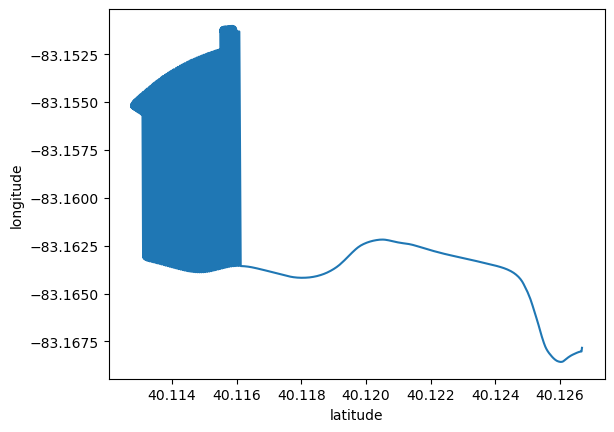

In [103]:
import seaborn as sns
sns.lineplot(x = 'latitude', y = 'longitude', data = trip)

In [136]:
pip install overpy

  Obtaining dependency information for overpy from https://files.pythonhosted.org/packages/ec/12/315d56e8386a4060d9a978a34ad48a9af072b67f40504eaa2f44197a15e5/overpy-0.7-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [137]:
import overpy

In [163]:
api = overpy.Overpass()

lat = '40.124959'
lon = '-83.157932'
radius = '1000'
# fetch all ways and nodes
result = api.query("""way(around:""" + radius + """,""" + lat  + """,""" + lon  + """) ["maxspeed"];(._;>;);
                    out body;
                        """)

In [164]:
for way in result.ways:
    try:
        print (way.tags['name'])
        print (way.tags['maxspeed'])
        print('\n')
    except:
        print ('none')

Kestrel Way East
25 mph


Kestrel Way West
25 mph


Muirfield Drive
35 mph


Muirfield Drive
35 mph




In [ ]:
def calculate_angle_from_yaw(yaw_rate):
    # Ensure yaw_angle is within the range [0, 2*pi)
    yaw_rate = yaw_rate % (2 * np.pi)

    # Convert yaw angle to angle in degrees
    angle_degrees = np.degrees(yaw_rate)

    # Calculate angle with respect to the positive x-axis
    angle_with_x_axis = 90 - angle_degrees

    # Ensure the result is within the range [0, 360)
    angle_with_x_axis = angle_with_x_axis % 360

    return angle_with_x_axis
import numpy as np

In [ ]:
Plotting Vehicle Orientation:
fig, ax = plt.subplots(figsize=(12,12))
for i,row in df2[feature_cols].iterrows():
    plt.plot(row['latitude'], row['longitude'], marker=(3, 0, row['yaw_angle']), markersize=10, linestyle='None')
plt.title('Vehicle Orientation along Path')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

df['yaw_angle'] = df.apply(lambda x: calculate_angle_from_yaw(x['yawrate']), axis=1)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
for i,row in df[feature_cols].iterrows():
    plt.plot(row['latitude'], row['longitude'], marker=(3, 0, row['yaw_angle']), markersize=10, linestyle='None')
plt.title('Vehicle Orientation along Path')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [ ]:
df_latlon.to_csv('locations_jan_22.csv',index = False)

In [ ]:
df_latlon = df[(df['latitude'] != 0)&(df['longitude'] != 0)]
df_latlon 

In [ ]:
gdf = gpd.gpd.GeoDataFrame(
    df["tripId"],
    geometry=gpd.points_from_xy(x=df["longitude"], y=df["latitude"]),
    crs="epsg:4386",
)

In [ ]:
gdf.head()

In [ ]:
m = gdf.explore(height=300, width=500)
m